In [125]:
# Import Data Science Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from PIL import Image

# Tensorflow Libraries
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Model
from tensorflow.keras.layers.experimental import preprocessing

# System libraries
from pathlib import Path
import os.path

# Metrics
from sklearn.metrics import classification_report, confusion_matrix
import itertools

ModuleNotFoundError: No module named 'tensorflow.keras.preprocessing'

In [1]:
from warnings import filterwarnings 
filterwarnings("ignore")

In [61]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np 
import tensorflow as tf
import PIL
import os
import cv2 as cv
import pathlib
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub

In [4]:
data_dir = '/kaggle/input/flowers-recognition/flowers'
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/kaggle/input/flowers-recognition/flowers')

In [5]:
img_count = len(list(data_dir.glob('*/*.jpg')))

In [6]:
roses = list(data_dir.glob("rose/*"))
roses[:5]

[PosixPath('/kaggle/input/flowers-recognition/flowers/rose/18492302751_cf6a5a583e_n.jpg'),
 PosixPath('/kaggle/input/flowers-recognition/flowers/rose/5002446424_b86e3c646f_n.jpg'),
 PosixPath('/kaggle/input/flowers-recognition/flowers/rose/6108118824_5b0231a56d.jpg'),
 PosixPath('/kaggle/input/flowers-recognition/flowers/rose/2265390547_2409007cef_n.jpg'),
 PosixPath('/kaggle/input/flowers-recognition/flowers/rose/2501297526_cbd66a3f7e_m.jpg')]

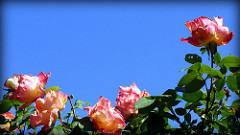

In [7]:
PIL.Image.open(roses[0])

In [8]:
flowers = {
    "daisy": list(data_dir.glob('daisy/*')),
    "dandelion": list(data_dir.glob('dandelion/*')),
    "rose": list(data_dir.glob('rose/*')),
    "sunflower": list(data_dir.glob('sunflower/*')),
    "tulip": list(data_dir.glob('tulip/*'))
}
labels = {
    "daisy": 0,
    "dandelion": 1,
    "rose": 2,
    "sunflower": 3,
    "tulip": 4,
}

In [9]:
flowers["daisy"][:5]

[PosixPath('/kaggle/input/flowers-recognition/flowers/daisy/34670512115_af22cce24d_n.jpg'),
 PosixPath('/kaggle/input/flowers-recognition/flowers/daisy/8882282142_9be2524d38_m.jpg'),
 PosixPath('/kaggle/input/flowers-recognition/flowers/daisy/19280272025_57de24e940_m.jpg'),
 PosixPath('/kaggle/input/flowers-recognition/flowers/daisy/5133243796_44de429de5_m.jpg'),
 PosixPath('/kaggle/input/flowers-recognition/flowers/daisy/34695914906_961f92ffcd_n.jpg')]

In [10]:
x,y =[],[]
for label,paths in flowers.items():
    for path in paths:
        img = cv.imread(str(path))
        img = cv.resize(img,(180,180))
        x.append(img)
        y.append(label)

In [11]:
x = np.array(x)
y = np.array(y)

In [12]:
mapped_y = np.array([labels[item] for item in y])

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,mapped_y,test_size=0.2,stratify=mapped_y)

In [14]:
x_train[0]

array([[[ 66, 134, 145],
        [ 77, 134, 151],
        [ 98, 141, 165],
        ...,
        [129, 151, 187],
        [130, 152, 186],
        [130, 153, 185]],

       [[ 68, 135, 146],
        [ 78, 136, 153],
        [ 97, 142, 165],
        ...,
        [131, 155, 190],
        [133, 157, 190],
        [132, 157, 189]],

       [[ 69, 136, 148],
        [ 79, 137, 156],
        [ 97, 143, 167],
        ...,
        [134, 160, 195],
        [136, 163, 195],
        [136, 163, 194]],

       ...,

       [[ 55,  74,  88],
        [ 57,  72,  94],
        [ 75,  95, 113],
        ...,
        [ 60, 157, 125],
        [ 48, 152, 124],
        [ 87, 164, 145]],

       [[ 67,  68, 101],
        [ 65,  60, 104],
        [123, 124, 163],
        ...,
        [ 55, 154, 120],
        [ 45, 152, 120],
        [ 63, 148, 123]],

       [[137, 114, 162],
        [ 98,  73, 136],
        [ 61,  50, 113],
        ...,
        [ 57, 154, 119],
        [ 54, 157, 123],
        [ 53, 150, 120]]

In [15]:
n_classes = 5

In [16]:
process = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

In [17]:
train_data_gen = tf.keras.preprocessing.image.NumpyArrayIterator(x_train,y_train,process)

In [18]:
process2 = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_data_gen = tf.keras.preprocessing.image.NumpyArrayIterator(x_test,y_test,process2)

# CNN

In [32]:
model = tf.keras.models.Sequential(
  [tf.keras.layers.Conv2D(16,3,padding='same',activation='relu'),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(32,3,padding='same',activation='relu'),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(64,3,padding='same',activation='relu'),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(n_classes,activation='softmax')])

In [33]:
import logging
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
logging.getLogger('tensorflow').setLevel(logging.ERROR) 

In [34]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = model.fit(train_data_gen,epochs=30,batch_size=32)

Epoch 1/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 31s 236ms/step - accuracy: 0.3145 - loss: 1.7249
Epoch 2/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 186ms/step - accuracy: 0.5617 - loss: 1.0830
Epoch 3/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 22s 186ms/step - accuracy: 0.6154 - loss: 0.9736
Epoch 4/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 186ms/step - accuracy: 0.6734 - loss: 0.8547
Epoch 5/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 185ms/step - accuracy: 0.7023 - loss: 0.7799
Epoch 6/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 22s 186ms/step - accuracy: 0.7060 - loss: 0.7593
Epoch 7/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 22s 188ms/step - accuracy: 0.7249 - loss: 0.7119
Epoch 8/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 185ms/step - accuracy: 0.7229 - loss: 0.6934
Epoch 9/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 184ms/step - accuracy: 0.7472 - loss: 0.6624
Epoch 10/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 22s 188ms/step - accuracy: 0.7769 - loss: 0.5814
Epoch 11/30
108/108 ━━━━━━━━━━━━━━━━━━━━ 21s 186ms/step - accuracy: 0.7891 - loss: 0.5406
Epoch 12/30
108/108

In [35]:
model.evaluate(test_data_gen)

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7137 - loss: 1.5222


[1.400580644607544, 0.7256944179534912]

In [36]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,967,857 (45.65 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,978,572 (30.44 MB)

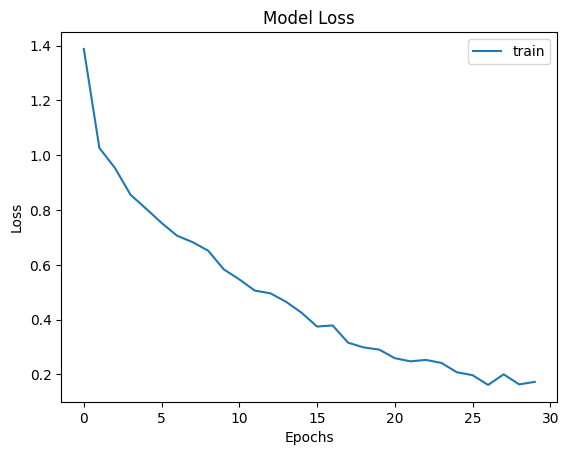

In [39]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train'])
plt.show()

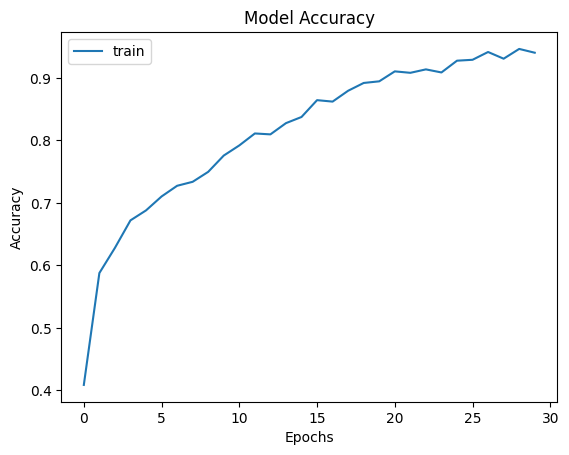

In [41]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train'])
plt.show()

In [58]:
# getting predictions on val set.
pred=model.predict(test_data_gen)
pred=np.argmax(pred,axis=1)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [59]:
pred[:5]

array([3, 4, 3, 3, 4])

In [60]:
y_test[:5]

array([4, 4, 3, 3, 4])